In [13]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input


In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


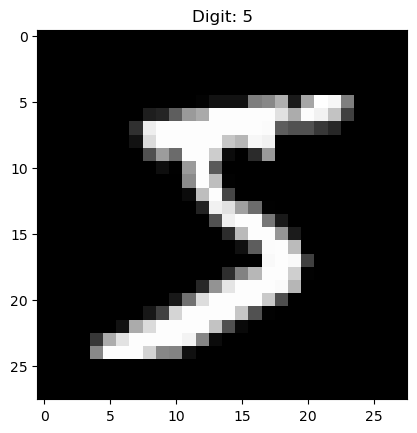

In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.title("Digit: " + str(y_train[0]))
plt.show()


In [5]:
# Normalize images
X_train = X_train / 255.0
X_test  = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)


In [6]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.9589 - loss: 0.1318 - val_accuracy: 0.9846 - val_loss: 0.0476
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9869 - loss: 0.0420 - val_accuracy: 0.9841 - val_loss: 0.0471
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9907 - loss: 0.0288 - val_accuracy: 0.9886 - val_loss: 0.0333
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9925 - loss: 0.0222 - val_accuracy: 0.9903 - val_loss: 0.0296
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9949 - loss: 0.0151 - val_accuracy: 0.9906 - val_loss: 0.0292


In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9906 - loss: 0.0292
Test Accuracy: 0.9905999898910522


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted digit: 7


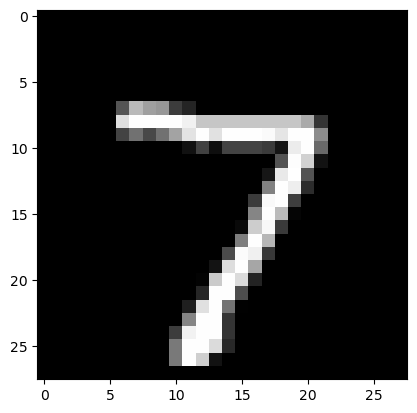

In [11]:
pred = model.predict(X_test[0:1])
print("Predicted digit:", np.argmax(pred))

plt.imshow(X_test[0].reshape(28,28), cmap='gray')
plt.show()
